<hr style="height:2px;background-color:white">
<font color='white' size=5><b>Classification of images with CNN</b></font>
<hr style="height:2px;background-color:white">

In [1]:
# https://www.tensorflow.org/tutorials/images/classification

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>IMPORT</b></font>
<hr style="height:2px;background-color:#de76d2">

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib
import PIL
import datetime
import os
import pathlib

from matplotlib import pyplot as plt
from tensorflow.keras import layers

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>DOWNLOAD IMAGES</b></font>
<hr style="height:2px;background-color:#de76d2">

In [4]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [5]:
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=data_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


<b><font color='yellow' size=4>Folder structure:</font></b>

C:\Users\Alvaro\.keras\datasets\flower_photos\\<br></bt>
  daisy\\<br>
  dandelion\\<br>
  roses\\<br>
  sunflowers\\<br>
  tulips\\<br>
</font>

In [6]:
# 3670 photos of flowers

In [7]:
img_count = len(list(data_dir.glob('*/*.jpg')))

print('Location of images:', data_dir)
print('Number of images:', img_count)

Location of images: /root/.keras/datasets/flower_photos
Number of images: 3670


JPEG
(500, 334)
RGB


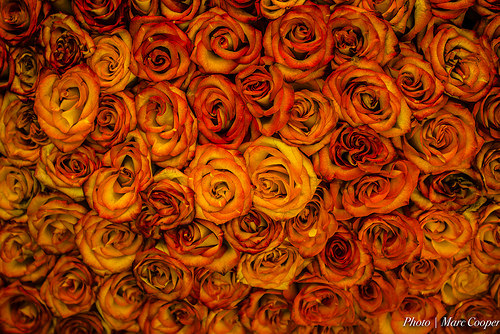

In [8]:
roses = list(data_dir.glob('roses/*'))

img = PIL.Image.open(str(roses[0]))

print(img.format)
print(img.size)
print(img.mode)

display(img)

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>CREATE DATASETS</b></font>
<hr style="height:2px;background-color:#de76d2">

<b><font color='yellow' size=4>NOTE:</font></b>

tf.keras.utils.image_dataset_from_directory

Default:

batch_size=32

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Load train images from file into a Dataset
ds_train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
# Load validation images from file into a Dataset
ds_val = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [12]:
print('Dataset:')
print(ds_train)

print('')

batch_train = ds_train.as_numpy_iterator().next() #cada batch se modifica los pesos de la red

#BATCH_TRAIN es una tupla de dos elementos, las imágenes y sus respectivas etiquetas
print('Batch image shape:', np.shape(batch_train[0]))
print('Batch label shape:', np.shape(batch_train[1]))

Dataset:
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Batch image shape: (32, 180, 180, 3)
Batch label shape: (32,)


In [13]:
print('Dataset:')
print(ds_train)

print('')
#BATCH DE 32 ELEMENTOS DONDE CADA IMAGEN TIENE 180x180PIXELES y cada pixel tiene 3 componentes: R, G y B
for batch_img, batch_lab in ds_train.take(1):
    print('Batch image shape:', batch_img.shape)
    print('Batch label shape:', batch_lab.shape)

Dataset:
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Batch image shape: (32, 180, 180, 3)
Batch label shape: (32,)


In [14]:
ds_batch = ds_train.take(1)

img, lab = ds_batch.get_single_element()

# Print labels of a batch of images provided with the take method
print(lab)

tf.Tensor([1 2 3 3 1 2 4 4 4 4 1 4 3 1 2 1 0 3 3 0 4 3 3 1 4 1 4 4 1 1 1 1], shape=(32,), dtype=int32)


In [15]:
list_classes = ds_train.class_names
num_classes = len(list_classes)

print('Flower classes (' + str(num_classes) + ' classes): ' + str(list_classes))

Flower classes (5 classes): ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


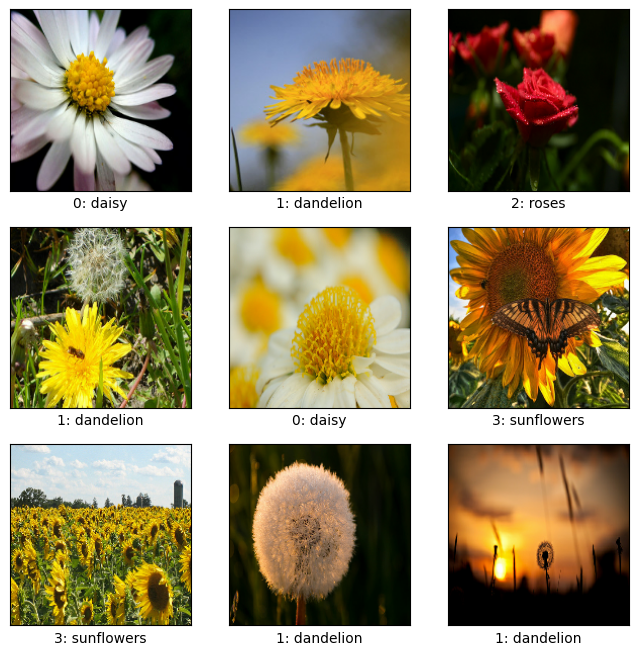

In [16]:
plt.figure(figsize=(8, 8))

for images, labels in ds_train.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.xlabel(str(labels[i].numpy()) + ': ' + str(list_classes[labels[i]]))

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>CREATE MODEL: basic model</b></font>
<hr style="height:2px;background-color:#de76d2">

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

ds_cache_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_cache_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
model_img = tf.keras.Sequential([

    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), name='Rescaling'),

    layers.Conv2D(16, 3, padding='same', activation='relu', name='Conv2D_16'),
    layers.MaxPooling2D(name='MaxPooling2D_16'),

    layers.Conv2D(32, 3, padding='same', activation='relu', name='Conv2D_32'),
    layers.MaxPooling2D(name='MaxPooling2D_32'),

    layers.Conv2D(64, 3, padding='same', activation='relu', name='Conv2D_64'),
    layers.MaxPooling2D(name='MaxPooling2D_64'),

    layers.Flatten(name='Flatten'),

    layers.Dense(128, activation='relu', name='Dense_128'),
    layers.Dense(num_classes, name='Dense_5')
])

In [19]:
16*3*3*3+16

448

In [20]:
32*3*3*16+32

4640

In [21]:
num_classes

5

In [22]:
model_img.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [23]:
model_img.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 Conv2D_16 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 MaxPooling2D_16 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 Conv2D_32 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 MaxPooling2D_32 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 Conv2D_64 (Conv2D)          (None, 45, 45, 64)        1

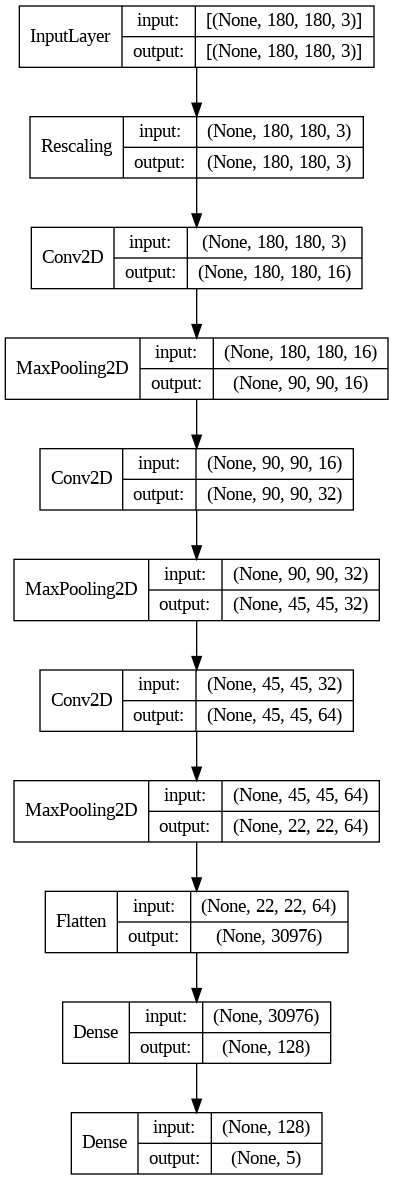

In [24]:
tf.keras.utils.plot_model(model_img,
                          to_file=".\\models_plots\model_img.png",
                          show_shapes=True,
                          show_trainable=False,
                          show_layer_names=False,
                          rankdir="TB")

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>TRAIN MODEL</b></font>
<hr style="height:2px;background-color:#de76d2">

In [25]:
epochs=10

hist = model_img.fit(
    ds_cache_train,
    validation_data=ds_cache_val,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 106s 1s/step - loss: 1.2693 - accuracy: 0.4683 - val_loss: 1.1819 - val_accuracy: 0.5123
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 0.9608 - accuracy: 0.6257 - val_loss: 1.0399 - val_accuracy: 0.5681
Epoch 3/10
92/92 [==============================] - 103s 1s/step - loss: 0.7742 - accuracy: 0.7071 - val_loss: 0.9058 - val_accuracy: 0.6580
Epoch 4/10
92/92 [==============================] - 99s 1s/step - loss: 0.5925 - accuracy: 0.7810 - val_loss: 0.9733 - val_accuracy: 0.6485
Epoch 5/10
92/92 [==============================] - 99s 1s/step - loss: 0.4038 - accuracy: 0.8597 - val_loss: 0.9559 - val_accuracy: 0.6553
Epoch 6/10
92/92 [==============================] - 96s 1s/step - loss: 0.2693 - accuracy: 0.9125 - val_loss: 1.0836 - val_accuracy: 0.6689
Epoch 7/10
92/92 [==============================] - 96s 1s/step - loss: 0.1482 - accuracy: 0.9557 - val_loss: 1.2721 - val_accuracy: 0.6540
Epoch 8/10
92/92 [

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>SHOW TRAIN HISTORY</b></font>
<hr style="height:2px;background-color:#de76d2">

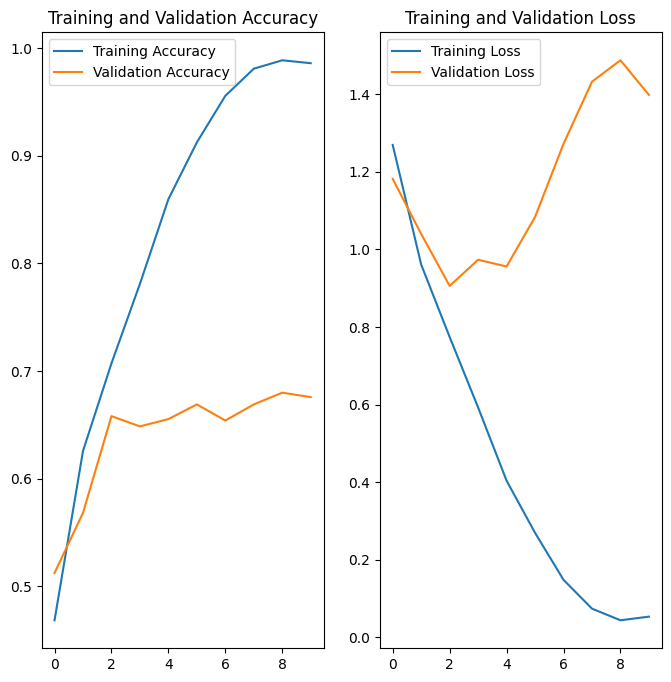

In [26]:
trn_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

trn_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, trn_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, trn_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

<hr style="height:2px;background-color:orange">
<font color='orange' size=4><b>DEBUG: take, get_single_element</b></font>
<hr style="height:2px;background-color:orange">

In [27]:
ds_cache_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
print(ds_cache_train.cardinality())

tf.Tensor(92, shape=(), dtype=int64)


In [29]:
img_ds = ds_cache_train.take(1)

img_single = img_ds.get_single_element()

print(img_ds.cardinality())

print(type(img_ds))
print(type(img_single))
print(type(img_single[0]))
print(type(img_single[1]))

print(img_single[0].shape)
print(img_single[1].shape)

tf.Tensor(1, shape=(), dtype=int64)
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 180, 180, 3)
(32,)


In [30]:
img_ds = ds_cache_train.take(5)

img = next(img_ds.as_numpy_iterator())

print(img_ds.cardinality())

print(type(img_ds))
print(type(img))
print(type(img[0]))
print(type(img[1]))

print(img[0].shape)
print(img[1].shape)

tf.Tensor(5, shape=(), dtype=int64)
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32, 180, 180, 3)
(32,)


In [31]:
img_ds = ds_cache_train.take(5)

img, lab = next(img_ds.as_numpy_iterator())

print(img_ds.cardinality())

print(type(img_ds))
print(type(img))
print(type(lab))

print(img.shape)
print(lab.shape)

tf.Tensor(5, shape=(), dtype=int64)
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32, 180, 180, 3)
(32,)


<hr style="height:2px;background-color:orange">
<font color='orange' size=4><b>DEBUG: data augmentation</b></font>
<hr style="height:2px;background-color:orange">

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal",
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [33]:
data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 180, 180, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


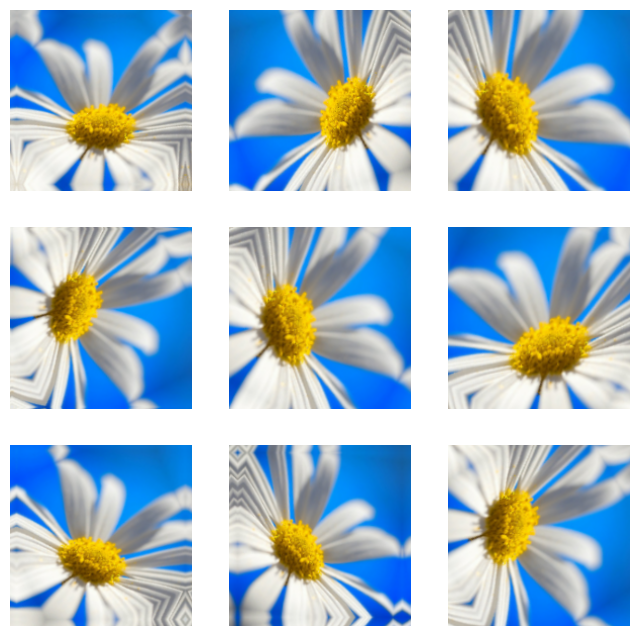

In [34]:
# Generate and show variations of some imnages using the data augmentation model

plt.figure(figsize=(8, 8))

# take(1) provides a dataset with one batch of images and labels
# get_single_element reads that batch as a tensor
img, lab = ds_cache_train.take(1).get_single_element()

for i in range(9):

    # Modify the batch of images
    aug_img = data_augmentation(img)

    # Plot the first modified image of the batch
    plt.subplot(3, 3, i + 1)
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.axis("off")

In [35]:
# # Generate and show variations of some imnages using the data augmentation model

# plt.figure(figsize=(10, 10))

# # take(1) provides a dataset with one batch of images and labels
# for img, lab in ds_cache_train.take(1):

#     for i in range(9):

#         # Returns a tensor (EagerTensor) of shape (32, 180, 180, 3)
#         # containing a batch of modified images corresponding to the
#         # batch read with take(1)
#         aug_img = data_augmentation(img)

#         # Plot the first modified image of the batch
#         plt.subplot(3, 3, i + 1)
#         plt.imshow(aug_img[0].numpy().astype("uint8"))
#         plt.axis("off")

In [36]:
# # Generate and show variations of some imnages using the data augmentation model

# plt.figure(figsize=(10, 10))

# # take(1) provides a dataset with one batch of images and labels
# img, lab = next(ds_cache_train.take(1).as_numpy_iterator())

# for i in range(9):

#     # Returns a tensor (EagerTensor) of shape (32, 180, 180, 3)
#     # containing a batch of modified images corresponding to the
#     # batch read with take(1)
#     aug_img = data_augmentation(img)

#     # Plot the first modified image of the batch
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(aug_img[0].numpy().astype("uint8"))
#     plt.axis("off")

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>CREATE MODEL with: <br>
    - Data augmentation<br>
    - Dropout layer
</b></font>
<hr style="height:2px;background-color:#de76d2">

<b><font color='yellow' size=4>NOTE:</font></b>

tf.keras.layers.MaxPooling2D

Default:

pool_size=(2, 2)<br>
padding='valid'

In [37]:
model_img_aug = tf.keras.Sequential([

    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3), name='RandomFlip'),
    layers.RandomRotation(0.2, name='RandomRotation'),
    layers.RandomZoom(0.2, name='RandomZoom'),

    layers.Rescaling(1./255, name='Rescaling'),

    layers.Conv2D(16, 3, padding='same', activation='relu', name='Conv2D_16'),
    layers.MaxPooling2D(name='MaxPooling2D_16'),

    layers.Conv2D(32, 3, padding='same', activation='relu', name='Conv2D_32'),
    layers.MaxPooling2D(name='MaxPooling2D_32'),

    layers.Conv2D(64, 3, padding='same', activation='relu', name='Conv2D_64'),
    layers.MaxPooling2D(name='MaxPooling2D_64'),
    layers.Dropout(0.2),

    layers.Flatten(name='Flatten'),

    layers.Dense(128, activation='relu', name='Dense_128'),
    layers.Dense(num_classes, name='Dense_5')
])

In [38]:
model_img_aug.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
model_img_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RandomFlip (RandomFlip)     (None, 180, 180, 3)       0         
                                                                 
 RandomRotation (RandomRota  (None, 180, 180, 3)       0         
 tion)                                                           
                                                                 
 RandomZoom (RandomZoom)     (None, 180, 180, 3)       0         
                                                                 
 Rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 Conv2D_16 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 MaxPooling2D_16 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                 

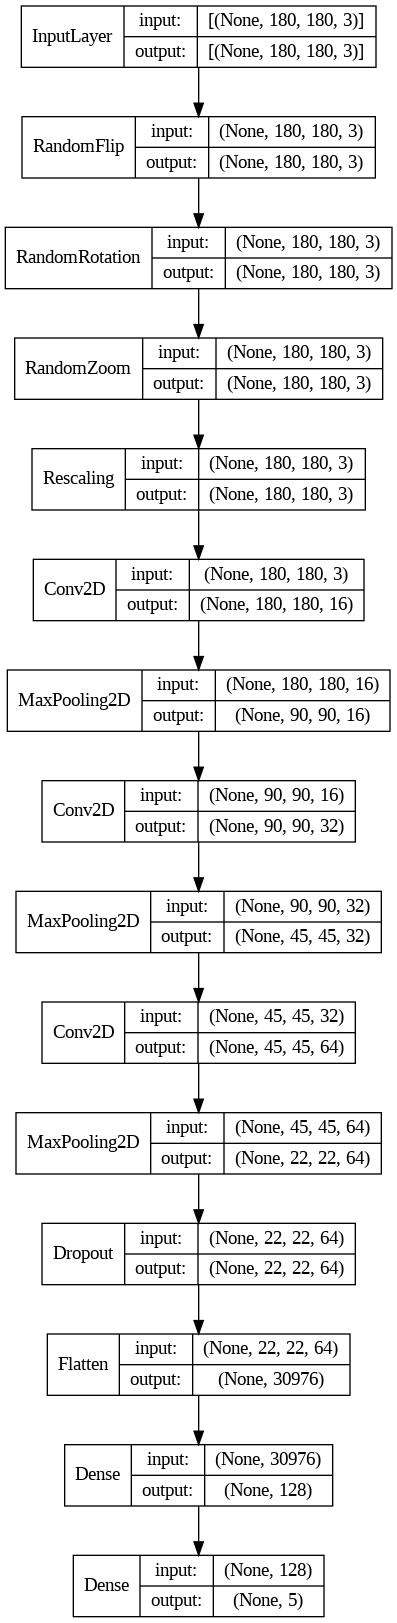

In [40]:
tf.keras.utils.plot_model(model_img_aug,
                          to_file=".\\models_plots\model_img_aug.png",
                          show_shapes=True,
                          show_trainable=False,
                          show_layer_names=False,
                          rankdir="TB")

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>TRAIN MODEL</b></font>
<hr style="height:2px;background-color:#de76d2">

In [41]:
# Increase epochs to 15 to account for additional data augmentation datapoints

epochs=15

his_aug = model_img_aug.fit(
    ds_cache_train,
    validation_data=ds_cache_val,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 118s 1s/step - loss: 1.3214 - accuracy: 0.4431 - val_loss: 1.1142 - val_accuracy: 0.5259
Epoch 2/15
92/92 [==============================] - 116s 1s/step - loss: 1.0962 - accuracy: 0.5490 - val_loss: 1.0267 - val_accuracy: 0.5817
Epoch 3/15
92/92 [==============================] - 112s 1s/step - loss: 0.9853 - accuracy: 0.6236 - val_loss: 0.9113 - val_accuracy: 0.6390
Epoch 4/15
92/92 [==============================] - 115s 1s/step - loss: 0.9044 - accuracy: 0.6533 - val_loss: 0.8513 - val_accuracy: 0.6717
Epoch 5/15
92/92 [==============================] - 115s 1s/step - loss: 0.8580 - accuracy: 0.6761 - val_loss: 0.8254 - val_accuracy: 0.6717
Epoch 6/15
92/92 [==============================] - 118s 1s/step - loss: 0.8336 - accuracy: 0.6727 - val_loss: 0.8465 - val_accuracy: 0.6839
Epoch 7/15
92/92 [==============================] - 118s 1s/step - loss: 0.7741 - accuracy: 0.7016 - val_loss: 0.7684 - val_accuracy: 0.6935
Epoch 8/15
92

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>SHOW TRAIN HISTORY</b></font>
<hr style="height:2px;background-color:#de76d2">

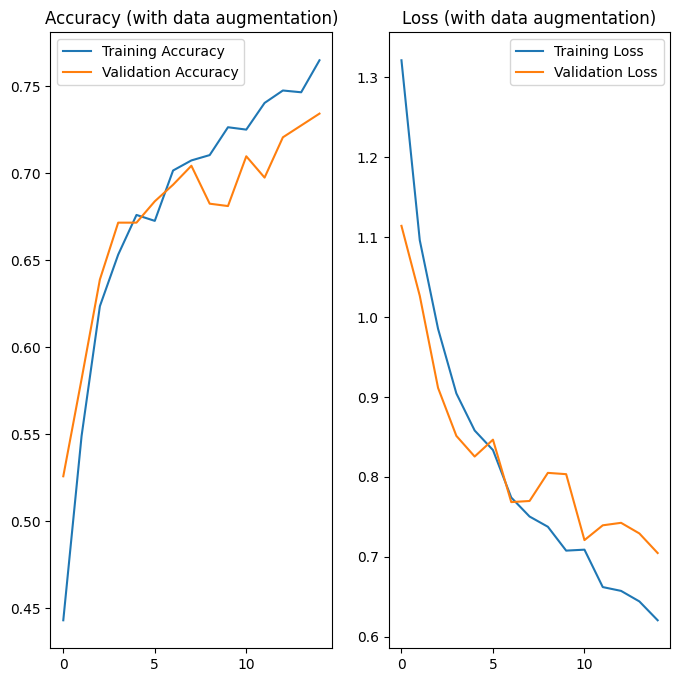

In [42]:
trn_acc = his_aug.history['accuracy']
val_acc = his_aug.history['val_accuracy']

trn_loss = his_aug.history['loss']
val_loss = his_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, trn_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy (with data augmentation)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, trn_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss (with data augmentation)')

plt.show()

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>EVALUATE MODEL ACCURACY</b></font>
<hr style="height:2px;background-color:#de76d2">

In [43]:
model_img_aug.evaluate(ds_cache_val)

23/23 [==============================] - 8s 344ms/step - loss: 0.7047 - accuracy: 0.7343


[0.7046571373939514, 0.7343324422836304]

<hr style="height:2px;background-color:#de76d2">
<font color='#de76d2' size=4><b>PREDICT ON NEW DATA</b></font>
<hr style="height:2px;background-color:#de76d2">

117948/117948 [==============================] - 0s 0us/step
<PIL.Image.Image image mode=RGB size=180x180 at 0x788163378700>


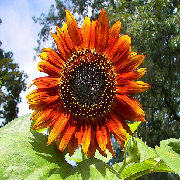

In [44]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

print(img)

display(img)

In [45]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model_img_aug.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(list_classes[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 148ms/step
This image most likely belongs to sunflowers with a 97.24 percent confidence.
